In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import sys
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [56]:
#loading the given dataset
dataf = pd.read_csv("//isslx110.essex.ac.uk//vv18859//pc//desktop//CE888-DS & DM//Credit Analysis//Bank marketing//bank-additional-full.csv",sep = ';')

In [57]:
#y = pd.get_dummies(dataf['y'], columns = ['y'], prefix = ['y'], drop_first = True)
dataf['y'].replace(("no","yes"),(0,1),inplace=True)
dataf.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


In [58]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [59]:
dataf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [60]:
dataf_client = dataf.iloc[: , 0:7]
dataf_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [61]:
print('Jobs:\n', dataf_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [62]:
print('Marital:\n', dataf_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [63]:
print('Education:\n', dataf_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [64]:
print('Default:\n', dataf_client['default'].unique())
print('Housing:\n', dataf_client['housing'].unique())
print('Loan:\n', dataf_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [65]:
print('Min age: ', dataf_client['age'].max())
print('Max age: ', dataf_client['age'].min())
print('Null Values: ', dataf_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


In [66]:
print('1º Quartile: ', dataf_client['age'].quantile(q = 0.25))
print('2º Quartile: ', dataf_client['age'].quantile(q = 0.50))
print('3º Quartile: ', dataf_client['age'].quantile(q = 0.75))
print('4º Quartile: ', dataf_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', dataf_client['age'].quantile(q = 0.75) + 
                      1.5*(dataf_client['age'].quantile(q = 0.75) - dataf_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [67]:
print('Numerber of outliers: ', dataf_client[dataf_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(dataf_client))
#Outliers in %
print('Outliers are:', round(dataf_client[dataf_client['age'] > 69.6]['age'].count()*100/len(dataf_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [68]:
print('MEAN:', round(dataf_client['age'].mean(), 1))

MEAN: 40.0


In [69]:
print('STD :', round(dataf_client['age'].std(), 1))

STD : 10.4


In [70]:
print('CV  :',round(dataf_client['age'].std()*100/dataf_client['age'].mean(), 1), ', High middle dispersion')

CV  : 26.0 , High middle dispersion


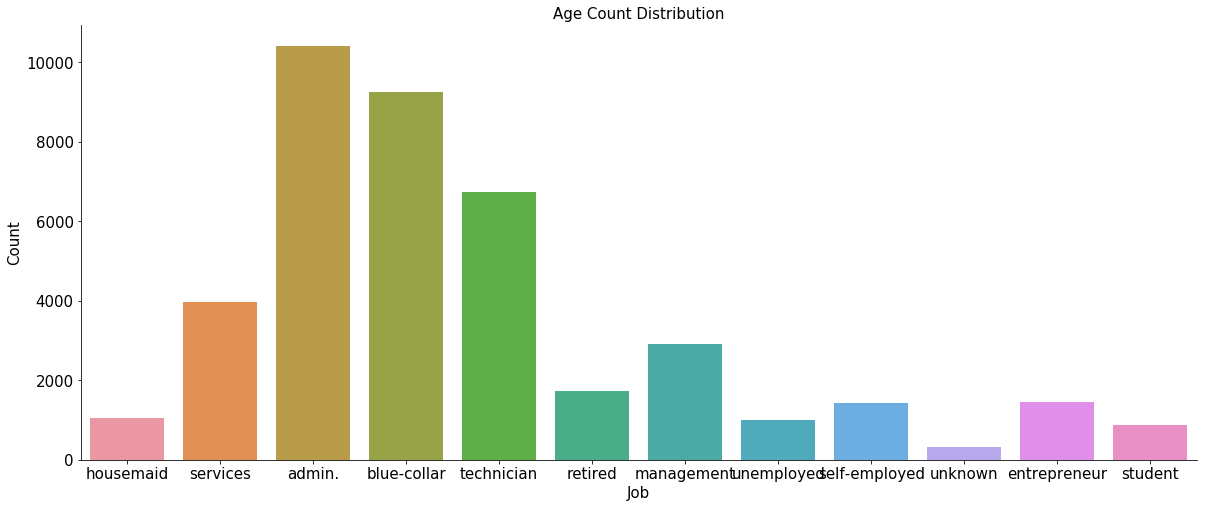

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = dataf_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

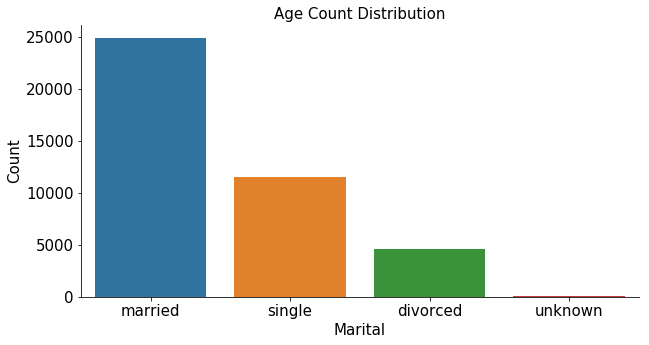

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = dataf_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

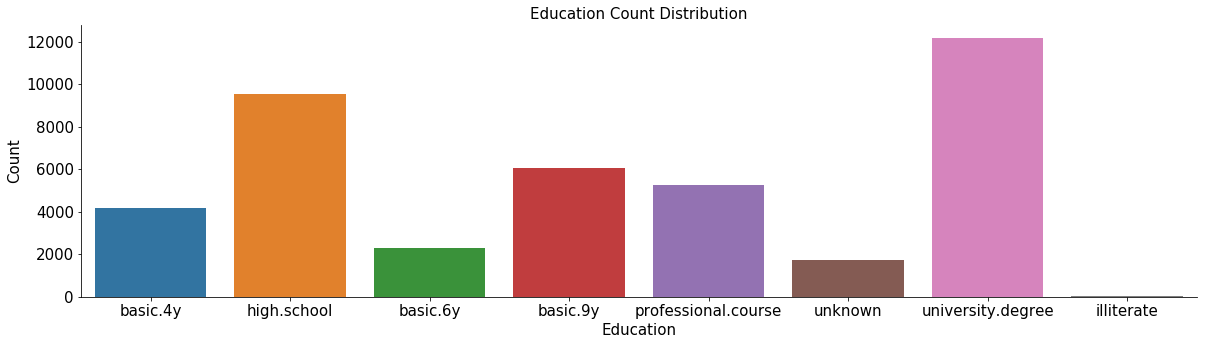

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = dataf_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

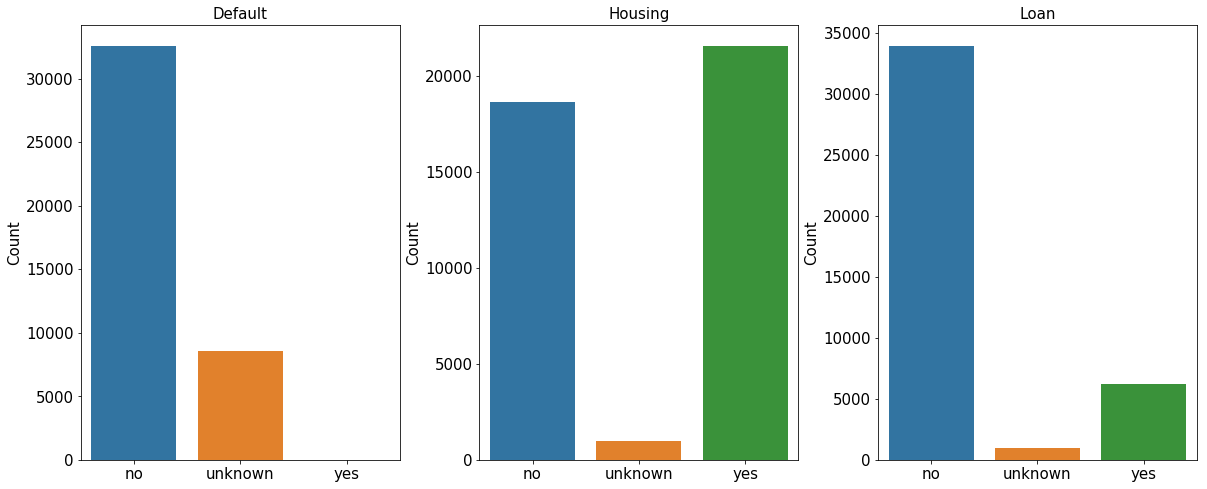

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = dataf_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = dataf_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = dataf_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [75]:
print('Default:\n No credit in default:'     , dataf_client[dataf_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', dataf_client[dataf_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , dataf_client[dataf_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [76]:
print('Housing:\n No housing in loan:'     , dataf_client[dataf_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', dataf_client[dataf_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , dataf_client[dataf_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [77]:
print('Housing:\n No to personal loan:'     , dataf_client[dataf_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', dataf_client[dataf_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , dataf_client[dataf_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataf_client['job']      = labelencoder_X.fit_transform(dataf_client['job']) 
dataf_client['marital']  = labelencoder_X.fit_transform(dataf_client['marital']) 
dataf_client['education']= labelencoder_X.fit_transform(dataf_client['education']) 
dataf_client['default']  = labelencoder_X.fit_transform(dataf_client['default']) 
dataf_client['housing']  = labelencoder_X.fit_transform(dataf_client['housing']) 
dataf_client['loan']     = labelencoder_X.fit_transform(dataf_client['loan']) 

In [79]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe

age(dataf_client);   

In [80]:
dataf_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [81]:
print(dataf_client.shape)
dataf_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [82]:
dataf_related = dataf.iloc[: , 7:11]
dataf_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [83]:
dataf_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [84]:
print("Kind of Contact: \n", dataf_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", dataf_related['month'].unique())
print("\nWhich days of week this campaing work: \n", dataf_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [85]:
print("Max duration  call in minutes:  ", round((dataf_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((dataf_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((dataf_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((dataf_related['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [86]:
print('1º Quartile: ', dataf_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', dataf_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', dataf_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', dataf_related['duration'].quantile(q = 1.00))

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [87]:
print('Duration calls above: ', dataf_related['duration'].quantile(q = 0.75) + 
                      1.5*(dataf_related['duration'].quantile(q = 0.75) - dataf_related['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  644.5 are outliers


In [88]:
print('Numerber of outliers: ', dataf_related[dataf_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(dataf_related))
#Outliers in %
print('Outliers are:', round(dataf_related[dataf_related['duration'] > 644.5]['duration'].count()*100/len(dataf_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [89]:
dataf[(dataf['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,0
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.80,93.08,-47.10,1.48,5099.10,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.30,5099.10,0


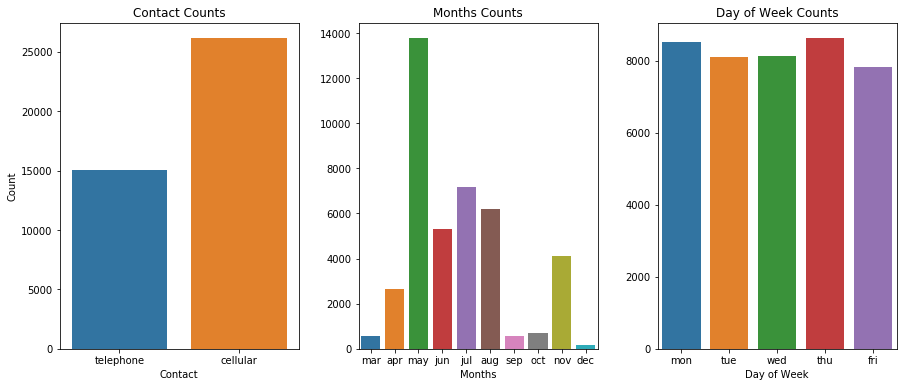

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(dataf_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(dataf_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(dataf_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [91]:
print('Ages above: ', dataf_related['duration'].quantile(q = 0.75) + 1.5*(dataf_related['duration'].quantile(q = 0.75) - dataf_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [92]:
dataf_related[dataf_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataf_related['contact']     = labelencoder_X.fit_transform(dataf_related['contact']) 
dataf_related['month']       = labelencoder_X.fit_transform(dataf_related['month']) 
dataf_related['day_of_week'] = labelencoder_X.fit_transform(dataf_related['day_of_week']) 

In [94]:
dataf_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [95]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5
    return data
duration(dataf_related);

In [96]:
dataf_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [97]:
dataf_se = dataf.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
dataf_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.10,93.99,-36.40,4.86,5191.00
1,1.10,93.99,-36.40,4.86,5191.00
2,1.10,93.99,-36.40,4.86,5191.00
3,1.10,93.99,-36.40,4.86,5191.00
4,1.10,93.99,-36.40,4.86,5191.00


In [98]:
dataf_o = dataf.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
dataf_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [99]:
dataf_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [100]:
dataf_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
#dataf_o.head()

In [101]:
dataf_final= pd.concat([dataf_client, dataf_related, dataf_se, dataf_o,dataf['y']], axis = 1)
dataf_final = dataf_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome','y']]
dataf_final.shape

(41188, 21)

In [102]:
dataf_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,3,3,1,0,0,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0
1,3,7,1,3,1,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0
2,2,7,1,3,0,2,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0
3,2,0,1,1,0,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0
4,3,7,1,3,0,0,2,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0


In [103]:
y=dataf_final['y']
x=dataf_final.drop(['y'],axis=1)

In [104]:

from sklearn.metrics import confusion_matrix
#Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
scores_accuracy=[]

In [105]:
from sklearn.ensemble import RandomForestClassifier
randomf= RandomForestClassifier(n_estimators=150,random_state=1) # n_estimators= number of trees
randomf.fit(x_train,y_train)
#randomf_score = randomf.score(x_test,y_test)
#scores_accuracy.append(["RF",randomf_score])
prediction_of_probability = randomf.predict_proba(x)
randomf_score = randomf.score(x_test,y_test)
scores_accuracy.append(["RF",randomf_score])

print("Random Forest Accuracy: ", randomf.score(x_test,y_test))

Random Forest Accuracy:  0.9062833835097601


In [106]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [107]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [108]:
x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [109]:
x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [110]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,prob_0,prob_1
0,3,3,1,0,0,0,0,1,6,1,...,93.99,-36.40,4.86,5191.00,1,999,0,1,1.00,0.10
1,3,7,1,3,1,0,0,1,6,1,...,93.99,-36.40,4.86,5191.00,1,999,0,1,1.00,0.10
2,2,7,1,3,0,2,0,1,6,1,...,93.99,-36.40,4.86,5191.00,1,999,0,1,1.00,0.10
3,2,0,1,1,0,0,0,1,6,1,...,93.99,-36.40,4.86,5191.00,1,999,0,1,1.00,0.10
4,3,7,1,3,0,0,2,1,6,1,...,93.99,-36.40,4.86,5191.00,1,999,0,1,1.00,0.10


In [111]:
x.drop(columns="prob_0",axis=1).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,prob_1
0,3,3,1,0,0,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0.10
1,3,7,1,3,1,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0.10
2,2,7,1,3,0,2,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0.10
3,2,0,1,1,0,0,0,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0.10
4,3,7,1,3,0,0,2,1,6,1,...,1.10,93.99,-36.40,4.86,5191.00,1,999,0,1,0.10


In [112]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9531439669822772


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.95,0.87,0.68,0.77


In [115]:
#Evaluating the model after transferring the knowledge
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.046856033017722745
Mean Squared Error: 0.046856033017722745
Root Mean Squared Error: 0.2164625441449923


In [116]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred1))  
print(classification_report(y_test1, y_pred1))  

[[7223   96]
 [ 290  629]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      7319
          1       0.87      0.68      0.77       919

avg / total       0.95      0.95      0.95      8238



In [117]:
#Performing other classification algorithms on the dataset
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.9090026221229485


In [118]:
# KNN  classification
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.8995824026415461 


In [119]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.9045838593765174


In [120]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8424783917645916


In [121]:
# Decision Tree Classification
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.8843352432747402


In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.88,0.49,0.53,0.51


In [123]:
#Applying the ml algorithms on the dataset after transfrring the knowledge
# Logistic regression classication
# LR with sklearn
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))

test accuracy 0.9541150764748726


In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.9115076474872542 


In [125]:
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.9384559359067735


In [126]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.9275309541150765
